<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [21]:
import pandas as pd

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
print(auto.shape)
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None
(397, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [22]:
import numpy as np

In [23]:
# Command(s)
np.sum(1*auto.isnull())

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      5.0
weight          0.0
acceleration    0.0
year            0.0
origin          0.0
dtype: float64

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

<i>
Data are not perfect; sometimes readings are missing due to sensor malfunctions, recorder malfunctions, or human error.  In the cases where data are missing, imputing data are an option using some sort of population statistic or inference. However, the nature of the missing data should be examined to understand any latent bias of the omissions or other reasons, to ensure the handling of the missing data are handled appropriately.  
</i>

In [24]:
# Command:
auto.loc[auto["horsepower"].isnull()]
# Comment (One - two sentence)
# 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

<i>This seems like an appropriate handling of the missing data.  Median is a good choice, as it is a stable statistical measure and not under the influence of outliers.  Average is also an option, though that may be affected by outliers.  </i>

In [49]:
# Command(s):
#np.median(auto.loc[auto["horsepower"].isnull() == False])
#auto["horsepower"] = 
print("Median:  " + str(np.median(auto["horsepower"].loc[auto["horsepower"].isnull() == False])))
auto["horsepower"].fillna(np.median(auto["horsepower"].loc[auto["horsepower"].isnull() == False]),inplace=True)


Median:  93.5


In [50]:
# check the former missing values
auto.iloc[[32,126,330,336,354]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,93.5,2046,19.0,71,1
126,21.0,6,200.0,93.5,2875,17.0,74,1
330,40.9,4,85.0,93.5,1835,17.3,80,2
336,23.6,4,140.0,93.5,2905,14.3,80,1
354,34.5,4,100.0,93.5,2320,15.8,81,2


<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

<i> The model has a high R<sup>2</sup> and a good F statistic, given the number of degrees of freedom.  Looking at the plot, it looks like some terms may be non-linear, which could be examined to make the model even better.  There are warnings about colinearity, so it may be worth plotting correlations and seeing if some features should be removed. 
   </i>

In [30]:
from scipy import stats
import statsmodels.api as sm

In [31]:
# Develop the model 
feature_names = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
features = auto[feature_names]
target = auto["mpg"]

model = sm.OLS(target, features).fit()
model.summary()

# TODO: Comment on its quality 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2961.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        08:13:56   Log-Likelihood:                -1045.3
No. Observations:                 397   AIC:                             2105.
Df Residuals:                     390   BIC:                             2133.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6770      0.324     -2.092      0.037      -1.313      -0.041
displacement     0.0212      0.008      2.780      0.006       0.006       0.036
horsepower      -0.0348      0.012     -2.820      0.005      -0.059      -0.011
weight          -0.0062      0.001     -9.673      0.000      -0.008      -0.005
acceleration    -0.0608      0.089     -0.682      0.495      -0.236       0.114
year             0.5820      0.024     24.186      0.000       0.535       0.629
origin           1.2785      0.279      4.576      0.000       0.729       1.828
==============================================================================
Omnibus:                       46.144   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.987
Skew:                           0.677   Prob(JB):                     2.13e-19
Kurtosis:                       4.834   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
import matplotlib.pyplot as plt

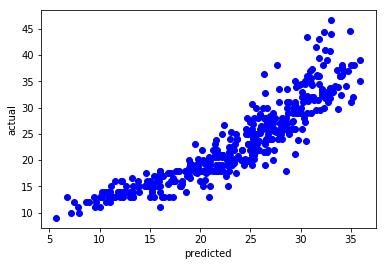

In [33]:
plt.scatter(model.fittedvalues,auto["mpg"], c="blue")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

<i> The result appears to be somewhat normal shaped, however, it is bimodal </i>

In [34]:
#from scipy.stats import boxcox, boxcox_normplot
from sklearn.preprocessing import PowerTransformer

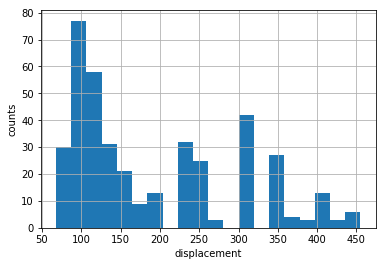

In [37]:
# Histogram of engine displacement
auto["displacement"].hist(bins=20)
plt.xlabel("displacement")
plt.ylabel("counts")
plt.show()

# Plot histogram of this new feature to reveal normal-like distribution


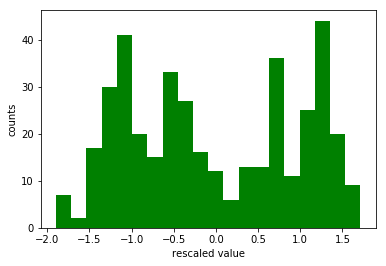

In [39]:
rescaled_values = auto["displacement"].values.reshape(-1,1)
pt = PowerTransformer(method="box-cox")
transformed_values = pt.fit_transform(rescaled_values)
#transformed_values = pt.(rescaled_values)
plt.hist(transformed_values, bins=20, color="green")
plt.xlabel("rescaled value")
plt.ylabel("counts")
plt.show()

<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>
<i> The models seems to be pretty comparable, noting the same tendencies in plots and summary statistics about the model. 
    </i>

In [40]:
np.setdiff1d(feature_names, ["displacement"]).flatten()

array(['acceleration', 'cylinders', 'horsepower', 'origin', 'weight',
       'year'], dtype='<U12')

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2991.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        08:16:47   Log-Likelihood:                -1043.4
No. Observations:                 397   AIC:                             2101.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
cylinders              0.4146      0

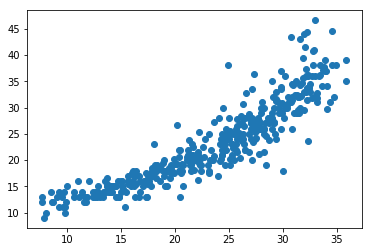

In [41]:
# Calculate then new model
features_m2 = auto[feature_names].drop("displacement",axis=1)
features_m2["displacement_trans"] = transformed_values
#features_m2 = pd.DataFrame(features_m2)
#features_m2["displacement_trans"].shape

model_m2 = sm.OLS(target, features_m2).fit()
print(model_m2.summary())

plt.scatter(model_m2.fittedvalues,target)
#model_m2.fittedvalues
plt.show()

# TODO: Comment on its performance
#

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [42]:
features_m2.describe()

,cylinders,horsepower,weight,acceleration,year,origin,displacement_trans
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,3.970000e+02
mean,5.458438,104.331234,2970.261965,15.555668,75.994962,1.574307,1.348767e-15
std,1.701577,38.266994,847.904119,2.749995,3.690005,0.802549,1.001262e+00
min,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,-1.896361e+00
25%,4.000000,76.000000,2223.000000,13.800000,73.000000,1.000000,-8.986998e-01
50%,4.000000,93.500000,2800.000000,15.500000,76.000000,1.000000,-1.901475e-01
75%,8.000000,125.000000,3609.000000,17.100000,79.000000,2.000000,8.713647e-01
max,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.713476e+00


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>
<i> The model appears to be a little less scattered towards the right half of curve.  The statistics about the model do not seem to be as favorable, and the nonlinearity of the model still appears to be present. 
    </i>

In [43]:
from sklearn.preprocessing import StandardScaler

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.8
Date:                Sun, 09 Dec 2018   Prob (F-statistic):          9.44e-142
Time:                        08:16:59   Log-Likelihood:                -221.05
No. Observations:                 397   AIC:                             456.1
Df Residuals:                     390   BIC:                             484.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.0978      0.070     -1.396   

C:\Users\ricej\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ricej\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


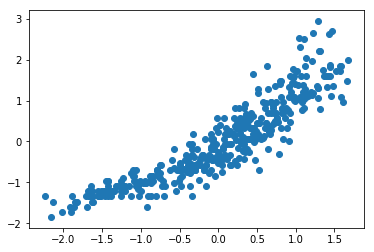

In [44]:
ss = StandardScaler()
auto_ss = ss.fit_transform(auto)
auto_ss = pd.DataFrame(auto_ss, columns=auto.columns)

feature_ss = auto_ss[feature_names]
target_ss = auto_ss["mpg"]

model_ss = sm.OLS(target_ss, feature_ss).fit()
print(model_ss.summary())

plt.scatter(model_ss.fittedvalues,target_ss)
plt.xlabel("")
plt.show()
